In [6]:
import os
os.environ[ "TF_CPP_MIN_LOG_LEVEL"] = "3"
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity( tf.compat.v1.logging.ERROR)
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [7]:
dataset, info = tfds.load( "imdb_reviews/subwords8k", with_info=True, as_supervised=True)

tokenizer = info.features[ "text"].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset[ "train"], dataset[ "test"]

train_dataset = train_data.shuffle( BUFFER_SIZE)

train_dataset = train_dataset.padded_batch( BATCH_SIZE)
test_dataset = test_data.padded_batch( BATCH_SIZE)

In [9]:
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print( f"batch_size: { batch_size}")
print( f"timesteps (sequence length): { timesteps}")
print( f"features (embedding size): { features}")
print( f"filters: { filters}")
print( f"kernel_size: { kernel_size}")

random_input = np.random.rand( batch_size, timesteps, features)
print( f"shape of input array: { random_input.shape}")

conv1d = tf.keras.layers.Conv1D( filters=filters, kernel_size=kernel_size, activation="relu")
result = conv1d( random_input)
print( f"shape of conv1d output: { result.shape}")

gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp( result)
print( f"shape of global max pooling output: { result.shape}")

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [10]:
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.Sequential( [
    tf.keras.layers.Embedding( tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D( filters=filters, kernel_size=kernel_size, activation="relu"),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense( dense_dim, activation="relu"),
    tf.keras.layers.Dense( 1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [11]:
model.compile(
	loss="binary_crossentropy",
	optimizer="adam",
	metrics=[ "accuracy"]
)

In [12]:
NUM_EPOCHS = 10

history = model.fit(
	train_dataset,
	epochs=NUM_EPOCHS,
	validation_data=test_dataset
)

Epoch 1/10
98/98 [==============================] - 134s 1s/step - loss: 0.6210 - accuracy: 0.6524 - val_loss: 0.4156 - val_accuracy: 0.8124
Epoch 2/10
98/98 [==============================] - 44s 447ms/step - loss: 0.2939 - accuracy: 0.8787 - val_loss: 0.2688 - val_accuracy: 0.8887
Epoch 3/10
98/98 [==============================] - 30s 310ms/step - loss: 0.1541 - accuracy: 0.9456 - val_loss: 0.2659 - val_accuracy: 0.8898
Epoch 4/10
98/98 [==============================] - 24s 242ms/step - loss: 0.0670 - accuracy: 0.9838 - val_loss: 0.2885 - val_accuracy: 0.8923
Epoch 5/10
98/98 [==============================] - 24s 246ms/step - loss: 0.0217 - accuracy: 0.9979 - val_loss: 0.3237 - val_accuracy: 0.8904
Epoch 6/10
98/98 [==============================] - 19s 191ms/step - loss: 0.0074 - accuracy: 0.9998 - val_loss: 0.3520 - val_accuracy: 0.8905
Epoch 7/10
98/98 [==============================] - 17s 169ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.3745 - val_accuracy: 0.8909
E

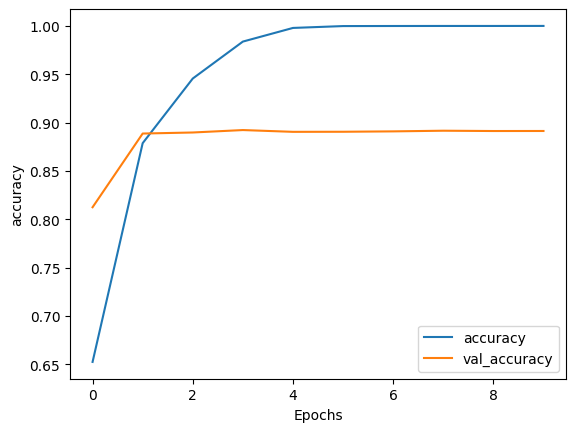

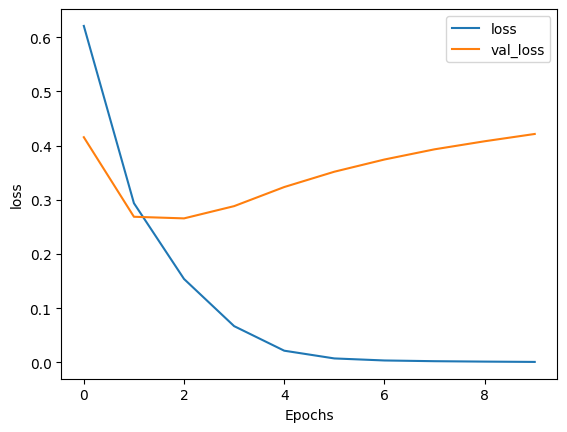

In [13]:
def plot_graphs( history, string):
	plt.plot( history.history[ string], label=string)
	plt.plot( history.history[ f"val_{ string}"], label=f"val_{ string}")
	plt.xlabel( "Epochs")
	plt.ylabel( string)
	plt.legend()
	plt.show()

plot_graphs( history, "accuracy")
plot_graphs( history, "loss")